In [10]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
data = pd.read_excel("C:/Users/Usuario/Documents/Projectes/ChallengeAuditoria/challenge-auditoria/data/inventory_data_new.xlsx")

data["cost_valor"] = data["preu_venda_unitari_2023"] / data["cost_unitari_stock_2023"]
features = [ 'proporcio_variacio_preu_venda_unitari_2022_2023', 'diferencia_entrada_sortida', 'dies_ultima_sortida', 'stock_final_2023', 'cost_valor']

X = data[features]

X = X.dropna()

In [7]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(X)

In [14]:
pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features)
X['PCA Component 1'] = pca_features[:, 0]
X['PCA Component 2'] = pca_features[:, 1]


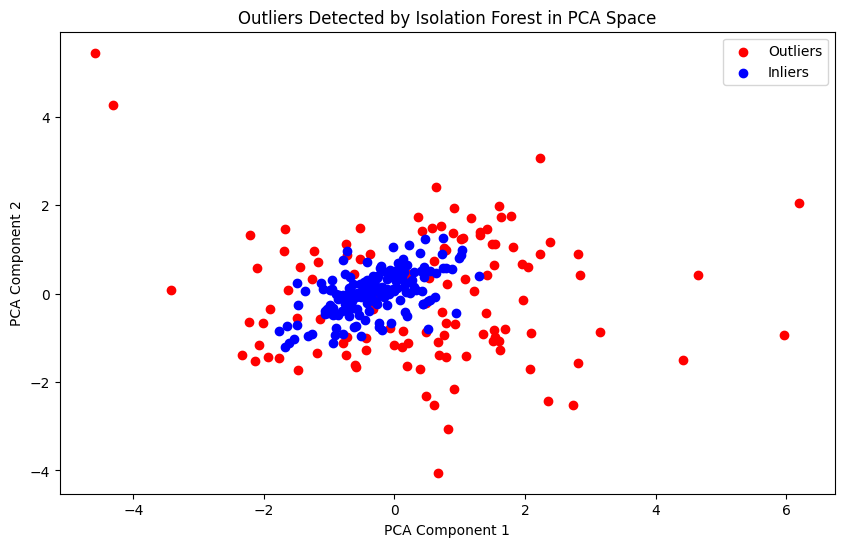

In [15]:
from sklearn.ensemble import IsolationForest

# Isolation Forest per detectar outliers
isolation_forest = IsolationForest(contamination=0.4, random_state=42)
outlier_labels = isolation_forest.fit_predict(scaled_features)
X['Outlier'] = outlier_labels

# Visualitzem al mateix PCA
plt.figure(figsize=(10, 6))
plt.scatter(X[X['Outlier'] == -1]['PCA Component 1'],
            X[X['Outlier'] == -1]['PCA Component 2'],
            color='red', label='Outliers')
plt.scatter(X[X['Outlier'] == 1]['PCA Component 1'],
            X[X['Outlier'] == 1]['PCA Component 2'],
            color='blue', label='Inliers')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Outliers Detected by Isolation Forest in PCA Space')
plt.legend()
plt.show()

C:\Users\Usuario\AppData\Local\Temp\ipykernel_7328\3628016060.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['Cluster'] = cluster_labels
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7328\3628016060.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  outliers_df['PCA Component 1'] = pca_features[:, 0]
C:\Users\Usuario\AppData\Local\Temp\ipykernel_7328\3628016060.py:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col

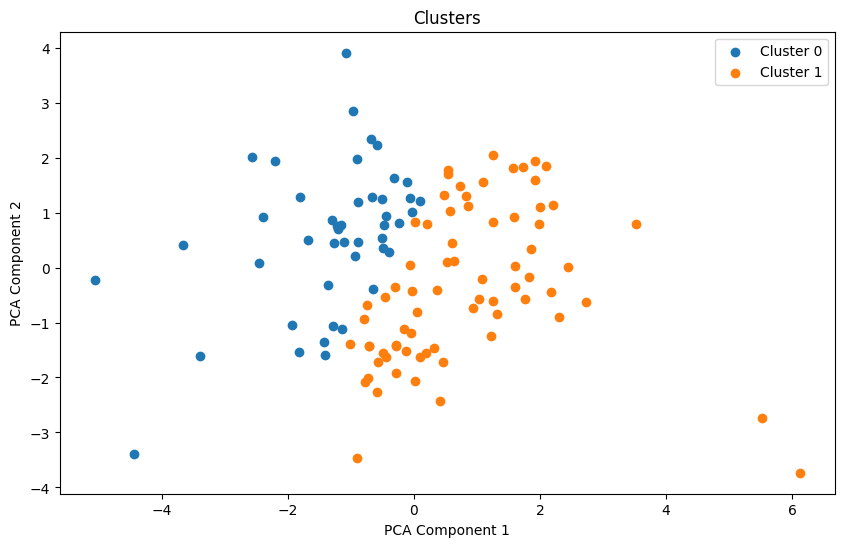

In [18]:
optimal_n_clusters = 2

outliers_df = X[X["Outlier"] == -1]
scaled_features2 = scaler.fit_transform(outliers_df)

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)

cluster_labels = kmeans.fit_predict(scaled_features2)
outliers_df['Cluster'] = cluster_labels

pca = PCA(n_components=2)
pca_features = pca.fit_transform(scaled_features2)
outliers_df['PCA Component 1'] = pca_features[:, 0]
outliers_df['PCA Component 2'] = pca_features[:, 1]
plt.figure(figsize=(10, 6))
for cluster in range(optimal_n_clusters):
    plt.scatter(outliers_df[outliers_df['Cluster'] == cluster]['PCA Component 1'],
                outliers_df[outliers_df['Cluster'] == cluster]['PCA Component 2'],
                label=f'Cluster {cluster}')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.title('Clusters')
plt.legend()
plt.show()

In [35]:
print(outliers_df[outliers_df["Cluster"]==0].iloc[[12]])

     proporcio_variacio_preu_venda_unitari_2022_2023  \
326                                          0.23544   

     diferencia_entrada_sortida  dies_ultima_sortida  stock_final_2023  \
326                       232.0                -51.0           43450.0   

     cost_valor  Outlier  PCA Component 1  PCA Component 2  Cluster  
326    1.401825       -1         -1.28644         -1.06648        0  
